In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)


# Homework 4

## Question 1 

## Question 2

## Question 3

## Question 4

## Question 5

Suppose that you have one continuous predictor $X$ and a binary categorical response $Y$ , which can take values 1 or 2. Suppose that you collect training data from the two classes and obtain class-specific sample means $\hat{\mu}_{1}=-1$ and $\hat{\mu}_{2}=3$, together with the pooled variance estimate over the two classes, $\hat{\sigma}^{2}=1$.

### Part A

Assume equal class priors and derive the LDA classification rule for this problem. Using `scipy.stats.norm.pdf` to compute the necessary probability density functions, show both of the estimated class-conditional densities in the same plot. Also show the estimated Bayes decision boundary in this plot. Make sure to label the axes. Let $c$ denote the position of the decision boundary. Report the numerical value of $c$.

## Kennon's Response
We can use the definition of the LDA decision boundary below and plug in the values with which we're familiar, including $\mu_k$, $\Sigma$, and $\pi_k$.

$$
\delta_k(x) = x^{T}\Sigma^{-1}\mu_k-\frac{1}{2} \mu_k^{T}\Sigma^{-1}\mu_k+ \log \pi_k
$$

$$
\delta_k(x) = x^{T}\Sigma^{-1}\mu_k-\frac{1}{2} \mu_k^{T}\Sigma^{-1}\mu_k+ \log \pi_k
$$


(-10.0, 10.0)

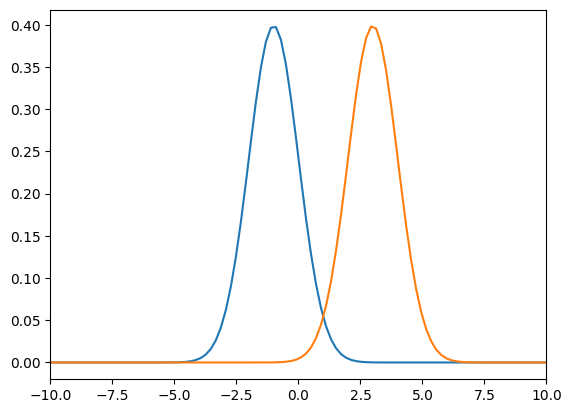

In [2]:
# initialize the parameters
mu_1 = -1
mu_2 = 3
pooled_variance = 1

# initialize the random variables
x = np.linspace(-10, 10, 100)
Y_1 = norm.pdf(
    x = x,
    loc = mu_1,
    scale = pooled_variance
)
Y_2 = norm.pdf(
    x = x,
    loc = mu_2,
    scale = pooled_variance
)

# plot the distributions
plt.plot(x, Y_1, label = 'Y_1')
plt.plot(x, Y_2, label = 'Y_2')
plt.xlim(-10, 10)

## Bayes Classifier

The **Bayes Classifier** is the theoretical optimal classifier that minimizes the probability of misclassification. It assigns a new observation $ X $ to the class $ k $ that has the highest posterior probability:

$$
P(Y = k \mid X = x) = \frac{P(X = x \mid Y = k) P(Y = k)}{P(X = x)}
$$

By Bayes' Theorem, the **Bayes Classifier** assigns $ X $ to the class:

$$
\hat{Y} = \arg\max_k P(Y = k \mid X = x)
$$

where:
- $ P(Y = k) $ is the prior probability of class $ k $,
- $ P(X = x \mid Y = k) $ is the class-conditional density,
- $ P(X = x) $ is the marginal density of $ X $.

If we know the true class-conditional distributions, the Bayes Classifier is optimal. However, in practice, these distributions are unknown, and we approximate them using models like **LDA** and **QDA**.

## Question 7

### Part A

In [3]:
auto_data = pd.read_csv("auto.csv")
auto_data = auto_data.drop('Unnamed: 0', axis = 1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto_data.loc[auto_data["mpg"] > 25, "mpg01"] = 1
auto_data.loc[auto_data["mpg"] <= 25, "mpg01"] = 0
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1.0
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1.0
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1.0
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.0


### Part B
Examining the pair plots of the auto data, I see that the `mpg01` predictor seems to have some relationship with `cylinders`, `displacement`, `horsepower`, and `weight`.

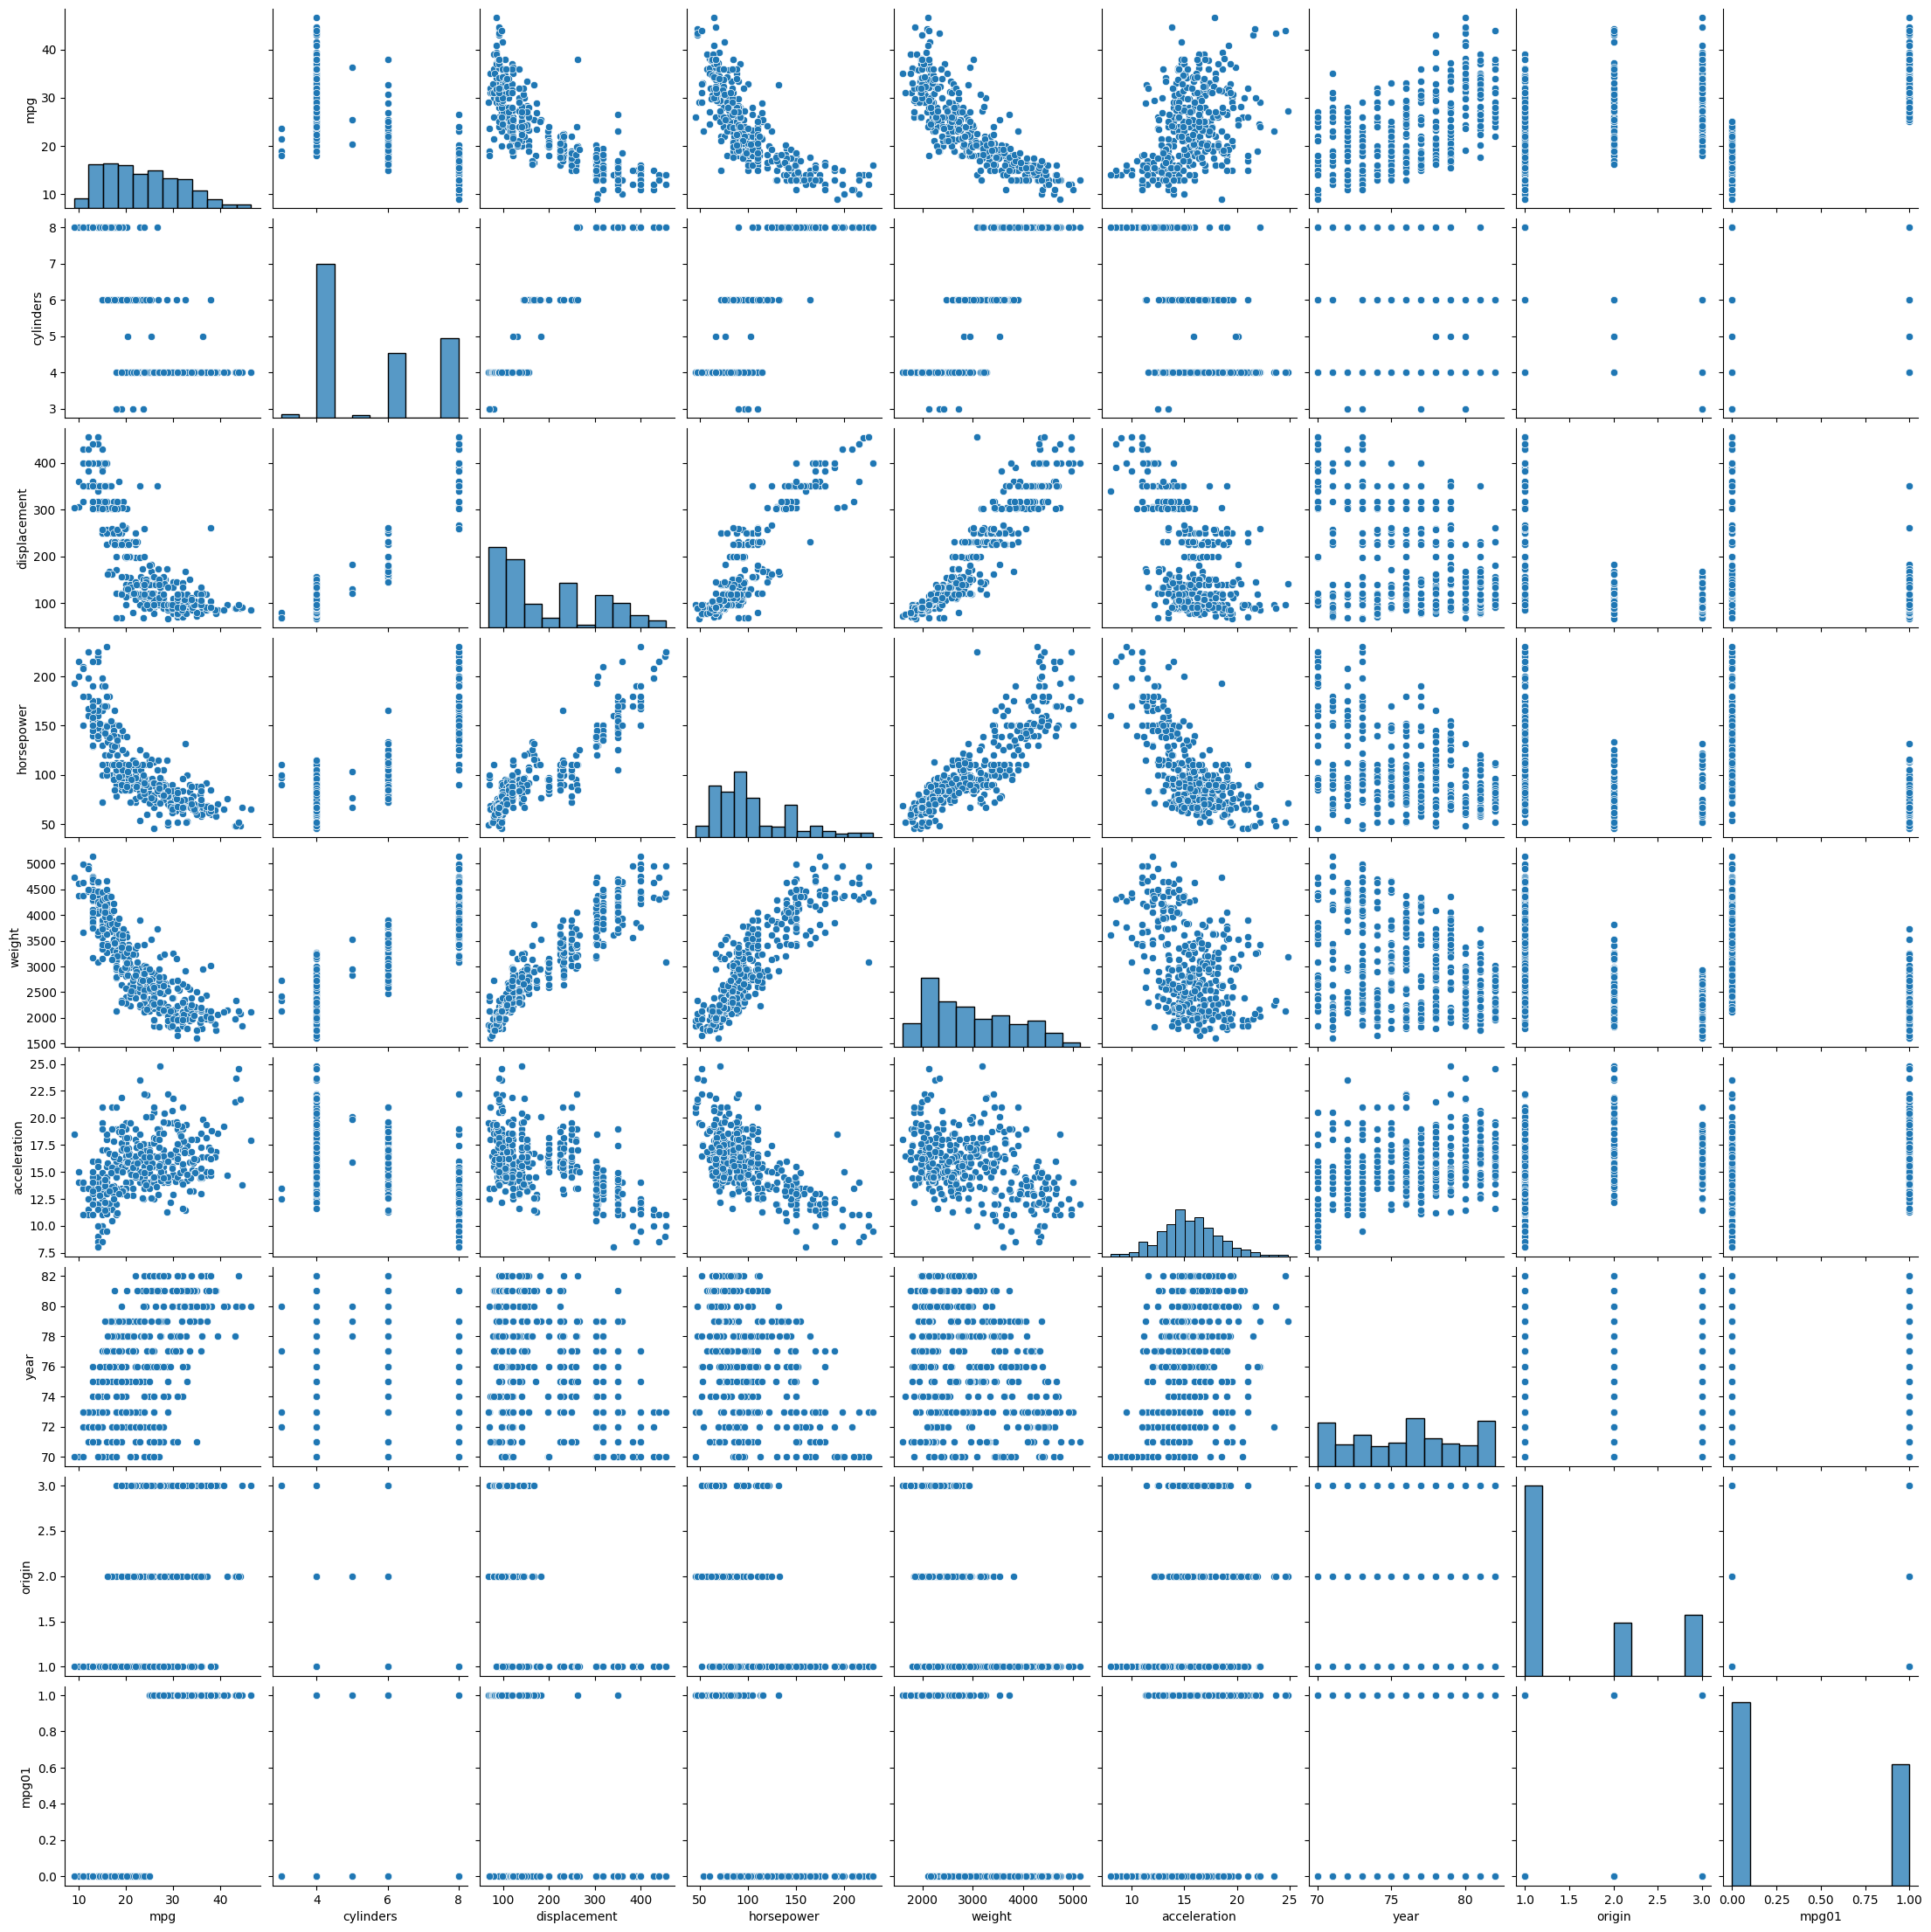

In [67]:
sns.pairplot(auto_data)

### Part C

Splitting the data into a train and test set.

In [25]:
columns_of_interest = ["cylinders", "horsepower", "weight", "displacement"]
predictors = auto_data[columns_of_interest]
target = ["mpg01"]
response = auto_data[target]

X_train, X_test, y_train, y_test = train_test_split( # X matrices versus y vectors
    predictors,
    response,
    test_size = 0.8,
    stratify = auto_data["mpg01"],
    random_state = 123
)
high_mpg_count = len(y_train[y_train == 1])
print(f"""The number of high mpg cars in the training set is {high_mpg_count}.""")

The number of high mpg cars in the training set is 78.


### Part D
I'll use `cylinders`, `displacement`, `horsepower`, and `weight` to predict the class assignments of `mpg01`.

When I assign class labels using the observations in the `X_test` set, then I simply assign the class label of whichever class-conditional probability is highest. Comparing the predictions of these predictions with their actual class labels allows me to find the classification rate of the naive Bayes classifier on the `X_test` set. The misclassification rate is $12.82$% since the training set was used to fit the LDA model. I'd expect that the misclassification rate for `y_test` would be a bit higher.

And weirdly enough, the misclassification rate for `y_test` is somehow lower than that for my training data at $0.318$%. This surprises me quite a bit, honestly.

**Question: I assume that the Naive Bayes classifier would assign the observation to whichever class-conditional probability is highest. Is this correct?**

In [26]:
lda = LDA() # initialize the model
lda.fit(X_train, y_train) # fit it with my training data
prediction_probabilities_x_train = lda.predict_proba(X_train) # generate prediction probabilities for the training predictors

# assign training set class probabilites
X_train["class_0_probability"] = [x for x, y in prediction_probabilities_x_train]
X_train["class_1_probability"] = [y for x, y in prediction_probabilities_x_train]

# add the true class labels
X_train["true_class_label"] = y_train

# generate naive bayes classifications
X_train.loc[X_train["class_0_probability"] > X_train["class_1_probability"], "naive_bayes_prediction"] = 0
X_train.loc[X_train["class_0_probability"] <= X_train["class_1_probability"], "naive_bayes_prediction"] = 1

# calculate misclassification rate
X_train["misclassification"] = X_train["naive_bayes_prediction"] != X_train["true_class_label"]
misclassification_rate = X_train["misclassification"].mean() * 100
print(f"""The misclassification rate is {misclassification_rate}.""")

The misclassification rate is 12.82051282051282.


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


I can use scatterplots to look at the observations for the training data points and their corresponding class labels.

ValueError: Unrecognized marker style ['+', 'o', 'o', '+', '+', 'o', 'o', 'o', 'o', 'o', '+', '+', 'o', '+', 'o', 'o', '+', '+', '+', '+', '+', '+', 'o', 'o', 'o', 'o', '+', 'o', 'o', '+', 'o', 'o', '+', 'o', '+', '+', 'o', '+', '+', 'o', '+', '+', '+', 'o', '+', '+', '+', 'o', '+', 'o', '+', 'o', '+', 'o', '+', '+', 'o', '+', '+', '+', 'o', 'o', '+', 'o', 'o', 'o', 'o', '+', '+', '+', '+', 'o', 'o', 'o', 'o', 'o', 'o', '+']

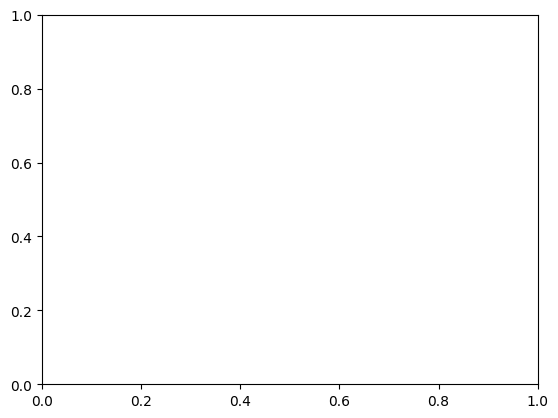